In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import math
import time
import pickle

np.random.seed(1234)

In [2]:
from plotnine import ggplot, aes, labs, scales, theme, element_rect, element_text, geom_line, geom_point, scale_x_continuous, scale_y_continuous

In [3]:
with open('computation_test-n_rep', 'rb') as f:
    df = pickle.load(f)

In [4]:
df = pd.DataFrame(df, columns = ['grid_size', 'n_routes', 'Repetition', 'sum_weights', 'time'])

In [5]:
factor_dict = {100: 'B=100',
               1000: 'B=1000',
               10000: 'B=10000',
               100000: 'B=100000',}

df['Repetition'] = df['Repetition'].apply(lambda s: factor_dict[s])
df['m_dist'] = df['grid_size'].apply(lambda s: s[0]+s[1]-1)
df

,grid_size,n_routes,Repetition,sum_weights,time,m_dist
0,"(2, 2)",2,B=100,995,0.002534,3
1,"(2, 2)",2,B=1000,932,0.023070,3
2,"(2, 2)",2,B=10000,952,0.228540,3
3,"(2, 2)",2,B=100000,884,2.283768,3
4,"(2, 3)",3,B=100,790,0.003080,4
...,...,...,...,...,...,...
83,"(6, 9)",1287,B=100000,302,954.882672,14
84,"(7, 8)",1716,B=100,322,1.244586,14
85,"(7, 8)",1716,B=1000,318,12.559065,14
86,"(7, 8)",1716,B=10000,318,137.069984,14


In [6]:
df['ab1'] = df['grid_size'].apply(lambda s: (s[0]+s[1]-2)**((min(s[0]-1, s[1]-1))))
df['ab2'] = df['grid_size'].apply(lambda s: (s[0]+s[1]-2)*(s[1]-1))
df['ab3'] = df['grid_size'].apply(lambda s: np.math.factorial(s[0]+s[1]-2)/np.math.factorial(s[0]-1)/np.math.factorial(s[1]-1))

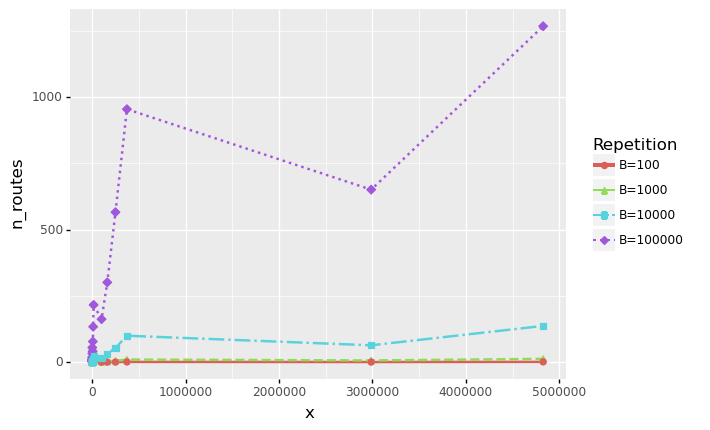

<ggplot: (8773626647081)>

In [7]:
(
    ggplot(data=df)
    + aes(x='ab1', y='time', group = 'Repetition') 
    + labs(
        x = "x",
        y = "n_routes") +
        #title = "Computation test with available routes (n=1000)") + 
    geom_line(data=df, size=1)
    + aes(color = 'Repetition', linetype = 'Repetition') +
    geom_point(data=df, size=2)
    + aes(color = 'Repetition', shape = 'Repetition') +
    theme(axis_title_x=element_text(size=12), axis_title_y=element_text(size=12), title=element_text(size=12))
)

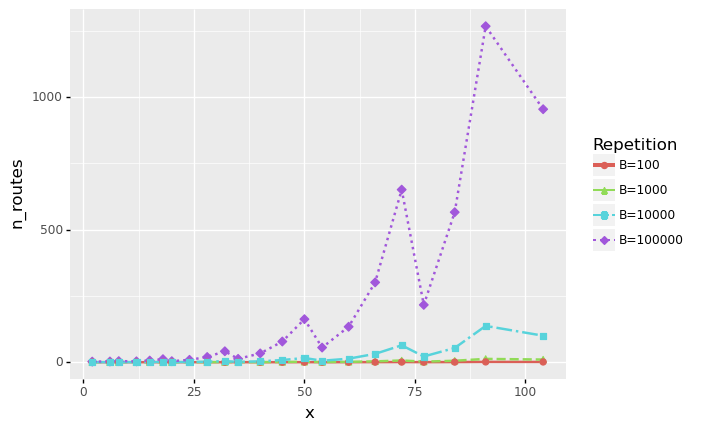

<ggplot: (8773624424321)>

In [8]:
(
    ggplot(data=df)
    + aes(x='ab2', y='time', group = 'Repetition') 
    + labs(
        x = "x",
        y = "n_routes") +
        #title = "Computation test with available routes (n=1000)") + 
    geom_line(data=df, size=1)
    + aes(color = 'Repetition', linetype = 'Repetition') +
    geom_point(data=df, size=2)
    + aes(color = 'Repetition', shape = 'Repetition') +
    theme(axis_title_x=element_text(size=12), axis_title_y=element_text(size=12), title=element_text(size=12))
)

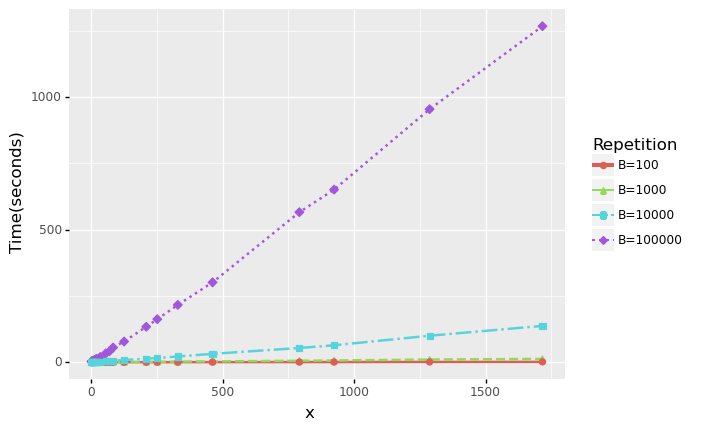

<ggplot: (8773626669505)>

In [9]:
(
    ggplot(data=df)
    + aes(x='ab3', y='time', group = 'Repetition') 
    + labs(
        x = "x",
        y = "Time(seconds)") +
        #title = "Computation test with available routes (n=1000)") + 
    geom_line(data=df, size=1)
    + aes(color = 'Repetition', linetype = 'Repetition') +
    geom_point(data=df, size=2)
    + aes(color = 'Repetition', shape = 'Repetition') +
    theme(axis_title_x=element_text(size=12), axis_title_y=element_text(size=12), title=element_text(size=12))
)

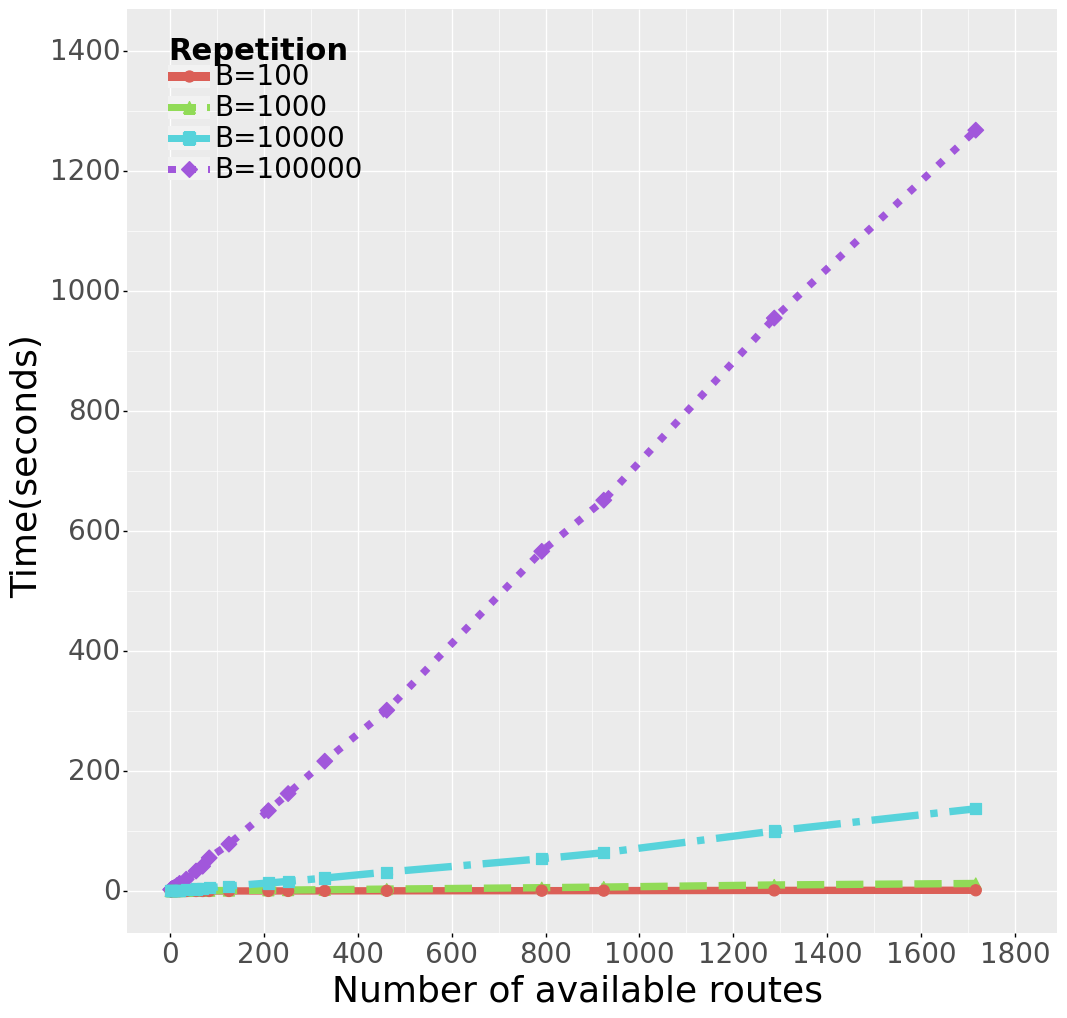

<ggplot: (8773624333245)>

In [10]:
(
    ggplot(data=df)
    + aes(x='n_routes', y='time', group = 'Repetition') 
    + labs(
        x = "Number of available routes",
        y = "Time(seconds)") +
        #title = "Computation test with available routes (n=1000)") + 
    geom_line(data=df, size=3)
    + aes(color = 'Repetition', linetype = 'Repetition') +
    geom_point(data=df, size=4)
    + aes(color = 'Repetition', shape = 'Repetition') +
    scale_x_continuous(limits = (0,1800), breaks=np.linspace(0,2000,11)) + 
    scale_y_continuous(limits = (0,1400), breaks=np.linspace(0,1400,8)) +
    theme(figure_size=(12,12), axis_text_x=element_text(size=20), axis_text_y=element_text(size=20), \
          axis_title_x=element_text(size=26, weight='normal'), axis_title_y=element_text(size=26, weight='normal'), \
          legend_position=(0.24, 0.80), legend_title_align='left', legend_background=element_rect(alpha=0), legend_direction='vertical', legend_key_width=30,\
          legend_title=element_text(size=22, weight='bold'), legend_spacing=100, legend_text=element_text(size=20))
)

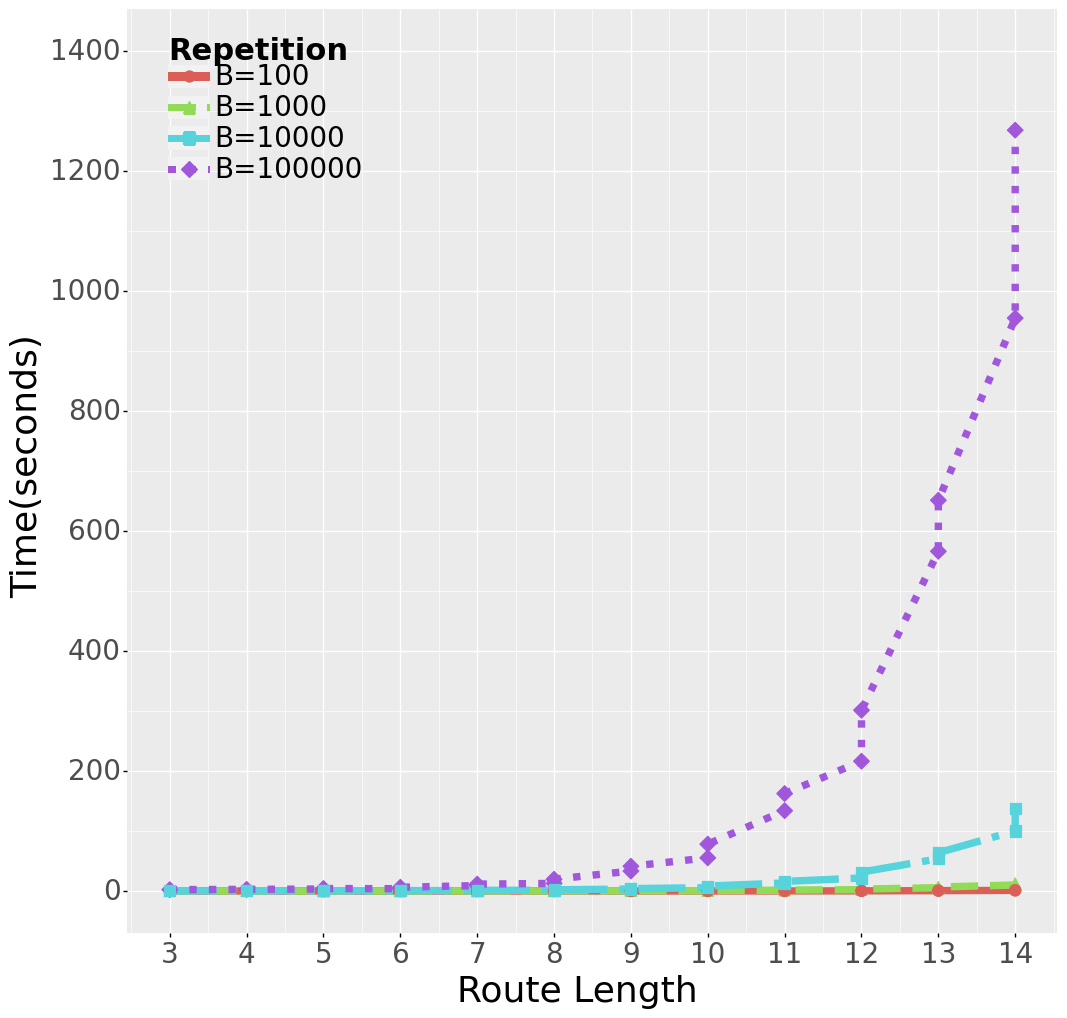

<ggplot: (8773623876697)>

In [11]:
(
    ggplot(data=df)
    + aes(x='m_dist', y='time', group = 'Repetition') 
    + labs(
        x = "Route Length",
        y = "Time(seconds)")+
        #title = "Computation test with route length (n=1000)") + 
    geom_line(data=df, size=3)
    + aes(color = 'Repetition', linetype = 'Repetition') +
    geom_point(data=df, size=4)
    + aes(color = 'Repetition', shape = 'Repetition') +
    scale_x_continuous(limits = (3,14), breaks=np.linspace(2,15,14)) + 
    scale_y_continuous(limits = (0,1400), breaks=np.linspace(0,1400,8)) +
    theme(figure_size=(12,12), axis_text_x=element_text(size=20), axis_text_y=element_text(size=20), \
          axis_title_x=element_text(size=26, weight='normal'), axis_title_y=element_text(size=26, weight='normal'), \
          legend_position=(0.24, 0.80), legend_title_align='left', legend_background=element_rect(alpha=0), legend_direction='vertical', legend_key_width=30,\
          legend_title=element_text(size=22, weight='bold'), legend_spacing=100, legend_text=element_text(size=20))
)

In [12]:
with open('computation_test-n_total', 'rb') as f:
    df = pickle.load(f)

In [13]:
df = pd.DataFrame(df, columns = ['grid_size', 'n_routes', 'Total points', 'sum_weights', 'time'])

In [14]:
factor_dict = {100: '100',
               1000: '1000',
               10000: '10000',
               100000: '100000',}

df['Total points'] = df['Total points'].apply(lambda s: factor_dict[s])
df['m_dist'] = df['grid_size'].apply(lambda s: s[0]+s[1]-1)
df

,grid_size,n_routes,Total points,sum_weights,time,m_dist
0,"(2, 2)",2,100,100,0.023690,3
1,"(2, 2)",2,1000,887,0.023862,3
2,"(2, 2)",2,10000,10000,0.023797,3
3,"(2, 2)",2,100000,91893,0.023692,3
4,"(2, 3)",3,100,76,0.028282,4
...,...,...,...,...,...,...
83,"(6, 9)",1287,100000,34598,9.326052,14
84,"(7, 8)",1716,100,26,12.323872,14
85,"(7, 8)",1716,1000,294,12.604741,14
86,"(7, 8)",1716,10000,3006,12.279697,14


In [15]:
#df = df.loc[(df['Total points']=='n=100') | (df['Total points']=='n=10000')]

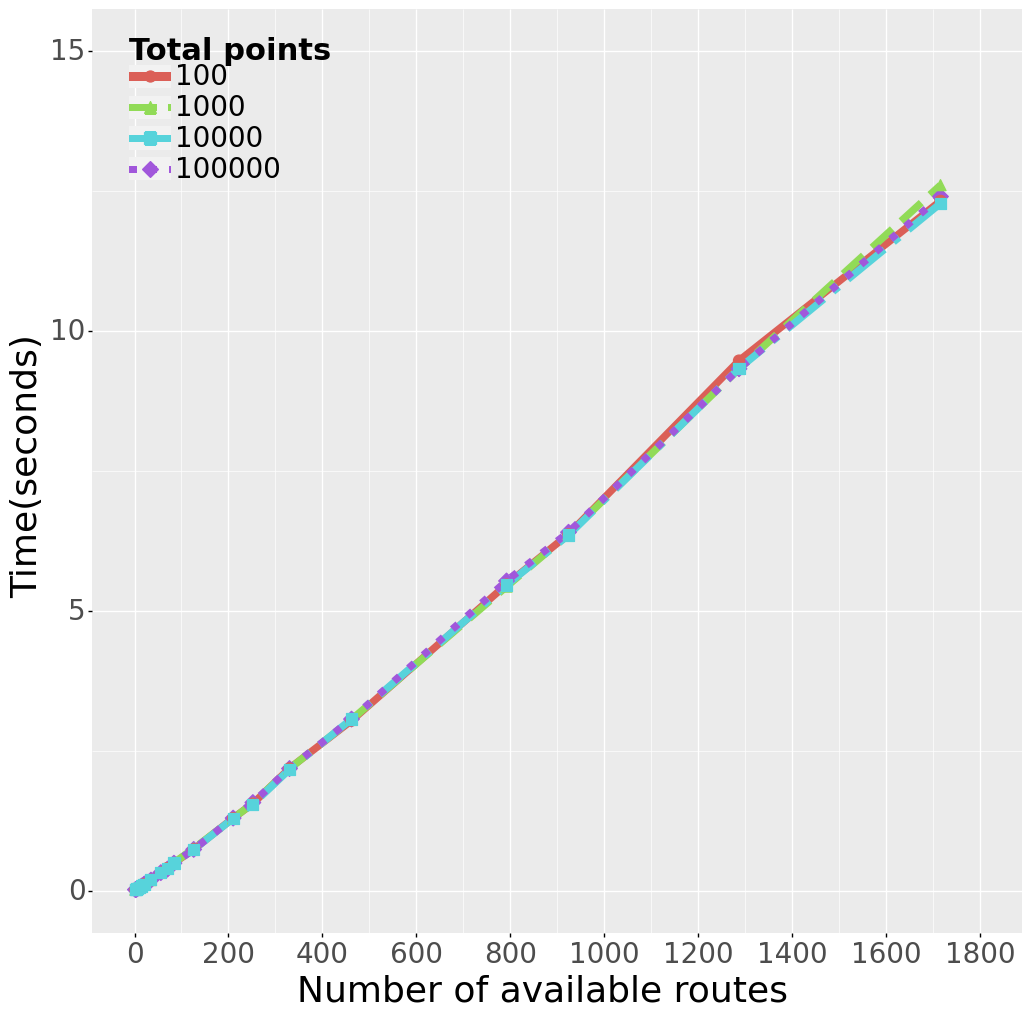

<ggplot: (8773624197621)>

In [16]:
(
    ggplot(data=df)
    + aes(x='n_routes', y='time', group = 'Total points') 
    + labs(
        x = "Number of available routes",
        y = "Time(seconds)")+
        #title = "Computation test with available routes (B=1000)") + 
    geom_line(data=df, size=3)
    + aes(color = 'Total points', linetype = 'Total points') +
    geom_point(data=df, size=4)
    + aes(color = 'Total points', shape = 'Total points') +
    scale_x_continuous(limits = (0,1800), breaks=np.linspace(0,2000,11)) + 
    scale_y_continuous(limits = (0,15), breaks=np.linspace(0,15,4)) +
    theme(figure_size=(12,12), axis_text_x=element_text(size=20), axis_text_y=element_text(size=20), \
          axis_title_x=element_text(size=26, weight='normal'), axis_title_y=element_text(size=26, weight='normal'), \
          legend_position=(0.24, 0.80), legend_title_align='left', legend_background=element_rect(alpha=0), legend_direction='vertical', legend_key_width=30,\
          legend_title=element_text(size=22, weight='bold'), legend_spacing=100, legend_text=element_text(size=20))
)

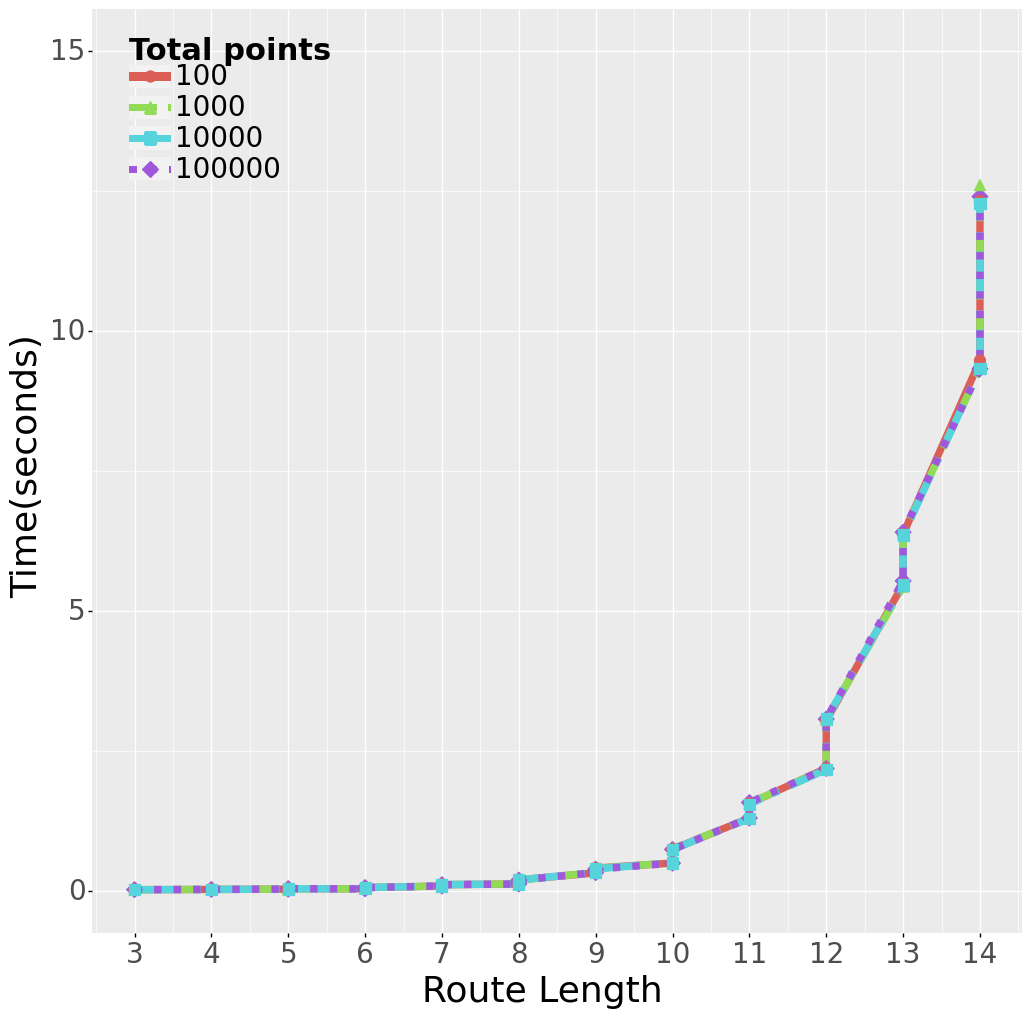

<ggplot: (8773624109149)>

In [17]:
(
    ggplot(data=df)
    + aes(x='m_dist', y='time', group = 'Total points') 
    + labs(
        x = "Route Length",
        y = "Time(seconds)")+
        #title = "Computation test with route length (B=1000)") + 
    geom_line(data=df, size=3)
    + aes(color = 'Total points', linetype = 'Total points') +
    geom_point(data=df, size=4)
    + aes(color = 'Total points', shape = 'Total points') +
    scale_x_continuous(limits = (3,14), breaks=np.linspace(2,15,14)) + 
    scale_y_continuous(limits = (0,15), breaks=np.linspace(0,15,4)) +
    theme(figure_size=(12,12), axis_text_x=element_text(size=20), axis_text_y=element_text(size=20), \
          axis_title_x=element_text(size=26, weight='normal'), axis_title_y=element_text(size=26, weight='normal'), \
          legend_position=(0.24, 0.80), legend_title_align='left', legend_background=element_rect(alpha=0), legend_direction='vertical', legend_key_width=30,\
          legend_title=element_text(size=22, weight='bold'), legend_spacing=100, legend_text=element_text(size=20))
)